<center>
    <span style="color: red; font-size: 20px;"><strong>Machine Learning & Polynomial Regression-Based Mathematical Models for Stability Check of Cantilever Retaining Wall</strong></span>
</center>

* It offers the user the opportunity to perform stability control of the cantilever retaining wall using this open-access environment that does not require any software license.
* This user-friendly environment was presented using Python Jupyter Notebook to evaluate the safety factors related to sliding, overturning, and slope stability of cantilever retaining walls (CRW).
* In this context, mathematical models based on Machine Learning and Polynomial Regression were developed to improve the stability assessment of CRW.
* The dataset with 2275 different wall designs utilized in the formulation of these mathematical models includes the design principles, theoretical frameworks, and limit equilibrium principles relevant to retaining wall engineering as documented in the existing literature.
* Citations of mathematical models:
  - GitHub library: https://github.com/semihyumusak/RetainingWallSafety
  - Pypi library: https://pypi.org/project/retainingwall-safety/
  - Esra Uray, Semih Yumusak, Suheda Seyhan, Ertugrul Taciroglu, "A Machine-Learning Model for Stability Assessment and Design of Cantilever Retaining Walls", Journal, Volume, Pages, Year, Doi.

In [ ]:
!pip install retainingwall-safety

<br>

<center>
    <img src="https://raw.githubusercontent.com/semihyumusak/RetainingWallSafety/refs/heads/main/wall_safety_factors.png" width="900" height="300" />
</center>

<br>

<span style="color: blue; font-size: 18px;"><strong> Definitions for Wall Dimension & Soil </strong></span>
- **$H$ :** Stem height
- **$H_a$ :** Wall height
- **$D_f$ :** Depth of base
- **$X_1$ :** Base length
- **$X_2$ :** Toe extension
- **$X_3$ :** Bas thickness
- **$X_4$ :** Front face angle
- **$\phi$ :** Angle of internal friction
- **$\delta$ :** Friction angle
- **$\gamma$ :** Unit volume weight

<span style="color: blue; font-size: 18px;"><strong>Explanations</strong></span>
- The active and passive horizontal ground pressures acting on the cantilever retaining wall (CRW) were calculated using Rankine's Theory (1857).
- The Bishop Method (1995) was incorporated into the mathematical model developed for the safety factor of slope stability.
- These mathematical models may be utilized for the CRW design, with a 6m stem height ($H$) in a cohesionless soil context without surcharge load, groundwater, and backfill soil slope.
- The properties of the backfill and base soil were considered the same. The $\phi$ of the base and backfill soil has varying values, which is a design parameter of the mathematical models.
- The soil's $\gamma$ and $\delta$ were taken as 18 kN/m³ and $2/3\phi$, respectively.
- $D_f$ is equal to the base thickness ($X_3$).
- $X_1$, $X_2$, $X_3$, $X_4$, and $\phi$ are design parameters of the mathematical models.

<span style="color: blue; font-size: 18px;"><strong>Guide for Mathematical Models </strong></span>

1) To determine the safety factors of sliding (Fs), overturning (Fo), and slope stability (Fss), enter the CRW dimensions, which are discrete values such as 1.55 or 0.65, according to the predefined limitations of the mathematical model as follows:
- **$X_1$ :** (m): 1.50 - 6.00
- **$X_2$ :** (m): 0.225 - 3.60
- **$X_3$ :** (m): 0.36 - 0.90
- **$X_4$ :** (%): 0.00 - 0.04
- **$\phi (°)$ :** 20 - 41

2) Using this mathematical model's function file, safety factors will be calculated based on the current user's design.

3) Run the "cantilever_wall.calculate_safety_factors" function provided below with safety_factors = cantilever_wall.calculate_safety_factors($X_1$, $X_2$, $X_3$, $X_4$, $\phi$).

4) The results of the CRW stability check analyses will be printed alongside the drawing of the CRW.

<span style="color: blue; font-size: 18px;"><strong>Application of Mathematical Models </strong></span>

In [ ]:
# Enter design parameters
# Example design
X1  = 2.10  # (1.50  - 6.00m)
X2  = 0.463 # (0.225 - 3.60m)
X3  = 0.48  # (0.36  - 0.90m)
X4  = 0.039 # (0.00  - 0.04)
phi = 39    # (20 - 41°)

<span style="color: blue; font-size: 18px;"><strong>Calculations of Safety Factors and Draw of CRW </strong></span>

In [ ]:
# First load required library and environments
# Second run class CantileverWallSafety(object) given below
# And then to determine safety factors run function given below and print result
# For CRW draw go end of Functions for Mathematical Models section
from retainingwall_safety import CantileverWallSafety
SafetyCalculator = CantileverWallSafety()
safety_factors = SafetyCalculator.calculate_safety_factors(X1, X2, X3, X4, phi)

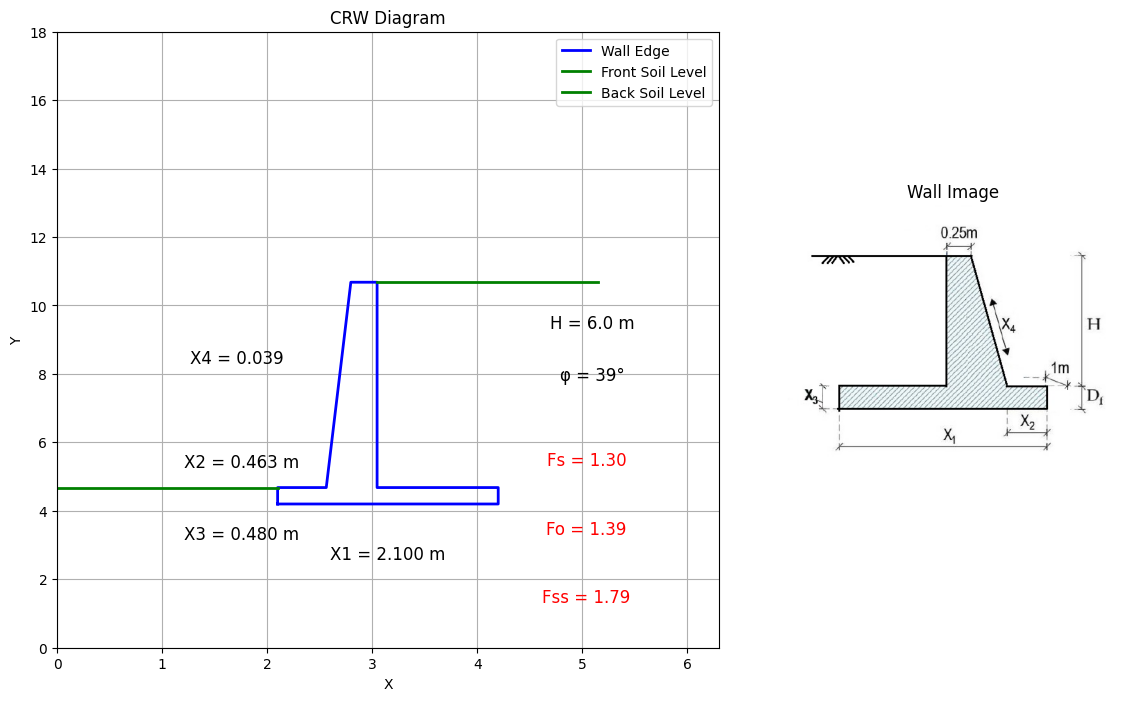

In [ ]:
SafetyCalculator.drawCRW(X1, X2, X3, X4,phi)

**References**


*   Rankine, W. J. M. (1857). II. On the stability of loose earth. Philosophical transactions of the Royal Society of London, (147), 9-27.
*   Bishop, A. W. (1955). The Use of Slip Surface in The Stability of Analysis Slopes. Geotechnique, 5.



<span style="color: blue; font-size: 18px;"><strong>Functions for Mathematical Models </strong></span>

In [ ]:
class CantileverWallSafety_Local(object):
    """
    Parameters
    ----------
    file_path : str
        File path of data in .csv format.
    input_col1 : int
        starting column of input data.
    input_col2 : int
        ending column of input data.
    output_col: int
        output column of data.
    degree : int
        degree of polynomial.
    saving_path : str
        the path to the file to save the model as .csv.
    """
    def __init__(self):
        pass

    def __calculate_sliding_safety_factor(self, X1, X2, X3, X4, phi):

        sliding = (
        (-0.002705877997833638) * 1 +
        (-2.460387052104366923) * X1 +
        (1.985971905253469227) * X2 +
        (-30.860863281045180173) * X3 +
        (10.965778175155929119) * X4 +
        (-1.857400941004449191) * phi +
        (-0.013577488437780725) * X1**2 +
        (0.022712055270084932) * X1 * X2 +
        (3.412123620610519215) * X1 * X3 +
        (-1.116042684858694845) * X1 * X4 +
        (0.227487361346641020) * X1 * phi +
        (-0.026143920644546872) * X2**2 +
        (-2.614016508055352794) * X2 * X3 +
        (0.919453427227493458) * X2 * X4 +
        (-0.184819895139848922) * X2 * phi +
        (23.264083685822296133) * X3**2 +
        (-10.408734819337819744) * X3 * X4 +
        (2.264004308902833884) * X3 * phi +
        (49.277828879303960719) * X4**2 +
        (-0.935590991214770296) * X4 * phi +
        (0.072234199128800844) * phi**2 +
        (0.005101639053821929) * X1**3 +
        (-0.018909591016545085) * X1**2 * X2 +
        (-0.014436076517446550) * X1**2 * X3 +
        (-0.049315157191607735) * X1**2 * X4 +
        (-0.000226402707862798) * X1**2 * phi +
        (0.026772075945777307) * X1 * X2**2 +
        (0.009229102556803028) * X1 * X2 * X3 +
        (0.140514357651674165) * X1 * X2 * X4 +
        (0.001344004315781110) * X1 * X2 * phi +
        (-1.755218977365988975) * X1 * X3**2 +
        (2.145326778607097307) * X1 * X3 * X4 +
        (-0.191049293851237673) * X1 * X3 * phi +
        (-27.823023325451725185) * X1 * X4**2 +
        (0.078666231703266032) * X1 * X4 * phi +
        (-0.006636102432048929) * X1 * phi**2 +
        (-0.006546706719229967) * X2**3 +
        (0.004196339178227176) * X2**2 * X3 +
        (-0.244837630325434652) * X2**2 * X4 +
        (-0.001675090875766116) * X2**2 * phi +
        (1.311194095878441379) * X2 * X3**2 +
        (-1.392190746816025504) * X2 * X3 * X4 +
        (0.148059183695928076) * X2 * X3 * phi +
        (31.218854330369097738) * X2 * X4**2 +
        (-0.072502404487518934) * X2 * X4 * phi +
        (0.005431668491119979) * X2 * phi**2 +
        (-10.707453438397489975) * X3**3 +
        (-6.078815290942281457) * X3**2 * X4 +
        (-0.928311469105961962) * X3**2 * phi +
        (-69.074790469728057474) * X3 * X4**2 +
        (0.903874810838874110) * X3 * X4 * phi +
        (-0.057106706186643486) * X3 * phi**2 +
        (16.772157709114374313) * X4**3 +
        (-0.629046428663753265) * X4**2 * phi +
        (0.021008357963275159) * X4 * phi**2 +
        (-0.001223421064777241) * phi**3 +
        (-0.000311302628657195) * X1**4 +
        (0.000569929840324335) * X1**3 * X2 +
        (0.000507534702766210) * X1**3 * X3 +
        (0.001389697885632257) * X1**3 * X4 +
        (-0.000017305660026778) * X1**3 * phi +
        (0.002432090037277401) * X1**2 * X2**2 +
        (0.000437246848592698) * X1**2 * X2 * X3 +
        (-0.016986094499004234) * X1**2 * X2 * X4 +
        (0.000082976990842809) * X1**2 * X2 * phi +
        (0.001759236755187965) * X1**2 * X3**2 +
        (0.002558123742247981) * X1**2 * X3 * X4 +
        (0.000292100616261948) * X1**2 * X3 * phi +
        (0.897110144917832808) * X1**2 * X4**2 +
        (0.000286925753837597) * X1**2 * X4 * phi +
        (0.000003470338631573) * X1**2 * phi**2 +
        (-0.009583133435775881) * X1 * X2**3 +
        (0.005464880106678449) * X1 * X2**2 * X3 +
        (0.076791260978155196) * X1 * X2**2 * X4 +
        (-0.000082472010816126) * X1 * X2**2 * phi +
        (0.006192079125792560) * X1 * X2 * X3**2 +
        (-0.152820874215751190) * X1 * X2 * X3 * X4 +
        (-0.001383502444847196) * X1 * X2 * X3 * phi +
        (-1.581438483153522645) * X1 * X2 * X4**2 +
        (-0.002934993562194843) * X1 * X2 * X4 * phi +
        (-0.000016735761469988) * X1 * X2 * phi**2 +
        (0.388886361097121602) * X1 * X3**3 +
        (-0.285572725860916976) * X1 * X3**2 * X4 +
        (0.043039915709971899) * X1 * X3**2 * phi +
        (5.375514387504702007) * X1 * X3 * X4**2 +
        (-0.067899941453968937) * X1 * X3 * X4 * phi +
        (0.002747321124298097) * X1 * X3 * phi**2 +
        (263.357767242502745830) * X1 * X4**3 +
        (0.112452678349950264) * X1 * X4**2 * phi +
        (-0.000704425916989493) * X1 * X4 * phi**2 +
        (0.000073816746700928) * X1 * phi**3 +
        (0.007765131027760219) * X2**4 +
        (-0.009742773460943793) * X2**3 * X3 +
        (-0.060213040432519266) * X2**3 * X4 +
        (-0.000000081411268837) * X2**3 * phi +
        (-0.008030812917468960) * X2**2 * X3**2 +
        (0.139437171917982328) * X2**2 * X3 * X4 +
        (0.001362345568737267) * X2**2 * X3 * phi +
        (0.673419067165895058) * X2**2 * X4**2 +
        (0.004292443013683034) * X2**2 * X4 * phi +
        (0.000020793733754965) * X2**2 * phi**2 +
        (-0.297027363752353890) * X2 * X3**3 +
        (0.293624157455539658) * X2 * X3**2 * X4 +
        (-0.032691047577817489) * X2 * X3**2 * phi +
        (-1.896257980399113752) * X2 * X3 * X4**2 +
        (0.052857999705487553) * X2 * X3 * X4 * phi +
        (-0.002055082581383871) * X2 * X3 * phi**2 +
        (-393.023542265161779596) * X2 * X4**3 +
        (-0.033270744973617247) * X2 * X4**2 * phi +
        (0.000726339532008069) * X2 * X4 * phi**2 +
        (-0.000062716635765625) * X2 * phi**3 +
        (2.720134987802950821) * X3**4 +
        (6.320979459525725375) * X3**3 * X4 +
        (0.129648207040013785) * X3**3 * phi +
        (30.276934059609132532) * X3**2 * X4**2 +
        (-0.234775303593004830) * X3**2 * X4 * phi +
        (0.011252369294236786) * X3**2 * phi**2 +
        (-1.809604570893369901) * X3 * X4**3 +
        (0.460585342659907082) * X3 * X4**2 * phi +
        (-0.008138198145371422) * X3 * X4 * phi**2 +
        (0.000472138191806692) * X3 * phi**3 +
        (1.366729771487512179) * X4**4 +
        (-6.040042416796755909) * X4**3 * phi +
        (0.006739146789133121) * X4**2 * phi**2 +
        (-0.000193246373891398) * X4 * phi**3 +
        (0.000007664603564272) * phi**4 +
        (17.66152)
    )
        return sliding

    def __calculate_overturning_safety_factor(self, X1, X2, X3, X4, phi):
        overturning = (
        (-0.000778178344479750) * 1 +
        (-0.809325680161480321) * X1 +
        (0.284147598966700998) * X2 +
        (0.602983974537667722) * X3 +
        (0.896492463413852581) * X4 +
        (-0.251033759860925410) * phi +
        (0.151113099102343357) * X1**2 +
        (0.003851318411004757) * X1 * X2 +
        (-0.307288538893864871) * X1 * X3 +
        (-0.164241519402796854) * X1 * X4 +
        (0.092379058933973898) * X1 * phi +
        (-0.138024156881198012) * X2**2 +
        (0.207641378987043379) * X2 * X3 +
        (-0.322323312284907293) * X2 * X4 +
        (-0.032653662070889683) * X2 * phi +
        (0.136290100735758979) * X3**2 +
        (2.347240874915006881) * X3 * X4 +
        (-0.059754299371559787) * X3 * phi +
        (-5.778381998144781484) * X4**2 +
        (-0.112594721775570492) * X4 * phi +
        (0.011430910249723109) * phi**2 +
        (-0.000146160664124290) * X1**3 +
        (-0.002695714703482143) * X1**2 * X2 +
        (0.002356807333709832) * X1**2 * X3 +
        (0.026028964018671722) * X1**2 * X4 +
        (-0.003775841407821851) * X1**2 * phi +
        (0.005479127171032702) * X1 * X2**2 +
        (-0.011633780501719945) * X1 * X2 * X3 +
        (0.010702498184525847) * X1 * X2 * X4 +
        (0.000193943895134579) * X1 * X2 * phi +
        (-0.055946746429612108) * X1 * X3**2 +
        (-0.046930111636235380) * X1 * X3 * X4 +
        (0.024059311422837314) * X1 * X3 * phi +
        (-5.898971417573407372) * X1 * X4**2 +
        (0.010696846733999593) * X1 * X4 * phi +
        (-0.003401426429640697) * X1 * phi**2 +
        (-0.001955978863859897) * X2**3 +
        (0.023613557872502782) * X2**2 * X3 +
        (-0.043294873669709542) * X2**2 * X4 +
        (0.001987121340135900) * X2**2 * phi +
        (0.054062822662204413) * X2 * X3**2 +
        (-0.058194225917431723) * X2 * X3 * X4 +
        (-0.017226190443661013) * X2 * X3 * phi +
        (2.970914256966261657) * X2 * X4**2 +
        (0.000137139366469155) * X2 * X4 * phi +
        (0.001322885648062933) * X2 * phi**2 +
        (0.052937120944326253) * X3**3 +
        (-2.364726071433905563) * X3**2 * X4 +
        (-0.008710451493422991) * X3**2 * phi +
        (4.590157667148671017) * X3 * X4**2 +
        (-0.058382937792937399) * X3 * X4 * phi +
        (0.001767274535795615) * X3 * phi**2 +
        (5.659146767447583493) * X4**3 +
        (0.778757017527346052) * X4**2 * phi +
        (0.003755087412125491) * X4 * phi**2 +
        (-0.000216919609815625) * phi**3 +
        (0.000004788682317070) * X1**4 +
        (0.000048158535770115) * X1**3 * X2 +
        (-0.000167559527141203) * X1**3 * X3 +
        (0.001862092745185506) * X1**3 * X4 +
        (0.000013687790634376) * X1**3 * phi +
        (0.001072465948237426) * X1**2 * X2**2 +
        (0.000578607970787182) * X1**2 * X2 * X3 +
        (-0.005115099519370718) * X1**2 * X2 * X4 +
        (-0.000058580191884428) * X1**2 * X2 * phi +
        (0.009977399418201402) * X1**2 * X3**2 +
        (-0.003672181488532164) * X1**2 * X3 * X4 +
        (-0.002340985216064184) * X1**2 * X3 * phi +
        (-0.068701672512304732) * X1**2 * X4**2 +
        (-0.001234753027255564) * X1**2 * X4 * phi +
        (0.000236715407566201) * X1**2 * phi**2 +
        (-0.003428315928008574) * X1 * X2**3 +
        (-0.000719844486437353) * X1 * X2**2 * X3 +
        (0.010801300656333789) * X1 * X2**2 * X4 +
        (0.000084584589026271) * X1 * X2**2 * phi +
        (0.003627022868622692) * X1 * X2 * X3**2 +
        (0.004514626650811953) * X1 * X2 * X3 * X4 +
        (0.000140895110391337) * X1 * X2 * X3 * phi +
        (0.141812725639552578) * X1 * X2 * X4**2 +
        (-0.000469935492246096) * X1 * X2 * X4 * phi +
        (0.000000161029445833) * X1 * X2 * phi**2 +
        (-0.020488463193310595) * X1 * X3**3 +
        (-0.018730326752249712) * X1 * X3**2 * X4 +
        (0.003162868071174399) * X1 * X3**2 * phi +
        (0.421785601541700417) * X1 * X3 * X4**2 +
        (0.002236721011174676) * X1 * X3 * X4 * phi +
        (-0.000459746186191129) * X1 * X3 * phi**2 +
        (96.398954052988969465) * X1 * X4**3 +
        (0.001707900999464152) * X1 * X4**2 * phi +
        (-0.000040597903392392) * X1 * X4 * phi**2 +
        (0.000040344309556906) * X1 * phi**3 +
        (0.002554719019748131) * X2**4 +
        (0.000545506761967270) * X2**3 * X3 +
        (-0.009713204514968626) * X2**3 * X4 +
        (-0.000028056036838642) * X2**3 * phi +
        (-0.032136630082500131) * X2**2 * X3**2 +
        (0.005368951068312467) * X2**2 * X3 * X4 +
        (0.003553683944411343) * X2**2 * X3 * phi +
        (0.172646765707378386) * X2**2 * X4**2 +
        (0.001546744182109816) * X2**2 * X4 * phi +
        (-0.000207427702898499) * X2**2 * phi**2 +
        (0.031024611458529517) * X2 * X3**3 +
        (-0.007731462620607718) * X2 * X3**2 * X4 +
        (-0.003595322033015456) * X2 * X3**2 * phi +
        (-1.018419974008921924) * X2 * X3 * X4**2 +
        (0.013657980955650574) * X2 * X3 * X4 * phi +
        (0.000339982871541467) * X2 * X3 * phi**2 +
        (-61.409538666460349532) * X2 * X4**3 +
        (0.001903376769296072) * X2 * X4**2 * phi +
        (-0.000685295230876903) * X2 * X4 * phi**2 +
        (-0.000016380944075634) * X2 * phi**3 +
        (-0.025509059461382984) * X3**4 +
        (1.202766019584658563) * X3**3 * X4 +
        (-0.000355504339584756) * X3**3 * phi +
        (-2.909632055913217830) * X3**2 * X4**2 +
        (0.003607099970837655) * X3**2 * X4 * phi +
        (0.000108159969671284) * X3**2 * phi**2 +
        (2.821980488391110597) * X3 * X4**3 +
        (-0.004992003727378787) * X3 * X4**2 * phi +
        (0.000644345537961499) * X3 * X4 * phi**2 +
        (-0.000015545911492776) * X3 * phi**3 +
        (0.489176935389226797) * X4**4 +
        (-8.037117405419792249) * X4**3 * phi +
        (-0.004750489305011638) * X4**2 * phi**2 +
        (-0.000040802810600038) * X4 * phi**3 +
        (0.000001430200842756) * phi**4 +
        (1.96294)
    )
        return overturning

    def __calculate_slope_stability_safety_factor(self, X1, X2, X3, X4, phi):
        slope_stability = (
        (-0.004451990260891091) * 1 +
        (-0.203262923665963990) * X1 +
        (0.296801670613494384) * X2 +
        (-6.332740900737842793) * X3 +
        (-1.336675062537132641) * X4 +
        (-0.604972322465899937) * phi +
        (0.043783623573443557) * X1**2 +
        (0.063847088050165521) * X1 * X2 +
        (-0.039471344067503612) * X1 * X3 +
        (3.406041820235253148) * X1 * X4 +
        (0.013203614280985120) * X1 * phi +
        (-0.056422187195693273) * X2**2 +
        (-0.862959816789284351) * X2 * X3 +
        (1.006658500359210340) * X2 * X4 +
        (-0.020802632790809687) * X2 * phi +
        (15.758947378254481109) * X3**2 +
        (24.139340086830078036) * X3 * X4 +
        (0.077248560734092572) * X3 * phi +
        (-338.443640338735065143) * X4**2 +
        (-0.240585265699649858) * X4 * phi +
        (0.031206427488817644) * phi**2 +
        (-0.018223522140744273) * X1**3 +
        (-0.004435081303380765) * X1**2 * X2 +
        (0.041930586093835390) * X1**2 * X3 +
        (0.290144188107120338) * X1**2 * X4 +
        (0.002713470915928906) * X1**2 * phi +
        (0.032614334945616802) * X1 * X2**2 +
        (0.126277039520652418) * X1 * X2 * X3 +
        (-0.614630198978643016) * X1 * X2 * X4 +
        (-0.006726795902574060) * X1 * X2 * phi +
        (0.018975939298116792) * X1 * X3**2 +
        (-8.029281742064444671) * X1 * X3 * X4 +
        (-0.006590482279908814) * X1 * X3 * phi +
        (-63.512451030524722739) * X1 * X4**2 +
        (-0.053475509293141599) * X1 * X4 * phi +
        (-0.000431046578896144) * X1 * phi**2 +
        (-0.037781904511620112) * X2**3 +
        (-0.060465391515947653) * X2**2 * X3 +
        (-0.064778009351209892) * X2**2 * X4 +
        (0.004624903491979637) * X2**2 * phi +
        (0.249615306564511918) * X2 * X3**2 +
        (4.467264354428065687) * X2 * X3 * X4 +
        (0.028137755785397789) * X2 * X3 * phi +
        (-39.085744842698815660) * X2 * X4**2 +
        (-0.035998789138118159) * X2 * X4 * phi +
        (0.000538913653485906) * X2 * phi**2 +
        (-18.466038609361060452) * X3**3 +
        (-7.597378324401006466) * X3**2 * X4 +
        (0.031127662278242596) * X3**2 * phi +
        (118.854702209037910166) * X3 * X4**2 +
        (-0.582224277375302690) * X3 * X4 * phi +
        (-0.003105936041173152) * X3 * phi**2 +
        (40.921179412429154354) * X4**3 +
        (25.703590693956073210) * X4**2 * phi +
        (-0.000963059408391587) * X4 * phi**2 +
        (-0.000655921081067490) * phi**3 +
        (0.001255557473797353) * X1**4 +
        (0.007964750945745891) * X1**3 * X2 +
        (-0.009631294458369410) * X1**3 * X3 +
        (-0.079474145721718514) * X1**3 * X4 +
        (-0.000113041288670956) * X1**3 * phi +
        (-0.041392159632977155) * X1**2 * X2**2 +
        (0.004168513991709588) * X1**2 * X2 * X3 +
        (0.135759911415552659) * X1**2 * X2 * X4 +
        (0.000223726945137059) * X1**2 * X2 * phi +
        (0.036920609002734528) * X1**2 * X3**2 +
        (0.694531853415663258) * X1**2 * X3 * X4 +
        (0.000468220299040922) * X1**2 * X3 * phi +
        (-0.794351712932760079) * X1**2 * X4**2 +
        (0.005789508907529495) * X1**2 * X4 * phi +
        (-0.000031695761382622) * X1**2 * phi**2 +
        (0.071785810837498687) * X1 * X2**3 +
        (0.030148875808840181) * X1 * X2**2 * X3 +
        (-0.114523649241533354) * X1 * X2**2 * X4 +
        (-0.000193975014639136) * X1 * X2**2 * phi +
        (-0.194170703444976223) * X1 * X2 * X3**2 +
        (-0.552962076773423794) * X1 * X2 * X3 * X4 +
        (-0.000192950693463700) * X1 * X2 * X3 * phi +
        (17.402527631432413102) * X1 * X2 * X4**2 +
        (-0.024336236835492464) * X1 * X2 * X4 * phi +
        (0.000086401283056148) * X1 * X2 * phi**2 +
        (-0.081945119722198312) * X1 * X3**3 +
        (2.997187323677807491) * X1 * X3**2 * X4 +
        (0.000699621997908739) * X1 * X3**2 * phi +
        (-31.030137314705871887) * X1 * X3 * X4**2 +
        (0.023993922224769371) * X1 * X3 * X4 * phi +
        (0.000003132420687280) * X1 * X3 * phi**2 +
        (851.585474951798573784) * X1 * X4**3 +
        (0.594923187356246386) * X1 * X4**2 * phi +
        (-0.000108053316125734) * X1 * X4 * phi**2 +
        (0.000006972751019241) * X1 * phi**3 +
        (-0.041236590841164045) * X2**4 +
        (-0.039582665539568129) * X2**3 * X3 +
        (0.199668319791404758) * X2**3 * X4 +
        (0.000189899185095044) * X2**3 * phi +
        (0.151435692138956357) * X2**2 * X3**2 +
        (-0.026440280026947635) * X2**2 * X3 * X4 +
        (-0.001783402222377717) * X2**2 * X3 * phi +
        (-18.657210440023057174) * X2**2 * X4**2 +
        (0.011395020987258420) * X2**2 * X4 * phi +
        (-0.000054212646315221) * X2**2 * phi**2 +
        (0.188046732420915186) * X2 * X3**3 +
        (-2.265350233886021858) * X2 * X3**2 * X4 +
        (-0.005295874496749509) * X2 * X3**2 * phi +
        (-36.758652049906153536) * X2 * X3 * X4**2 +
        (0.097928303902502289) * X2 * X3 * X4 * phi +
        (-0.000196735435693540) * X2 * X3 * phi**2 +
        (55.212773573455763199) * X2 * X4**3 +
        (1.244533181494660523) * X2 * X4**2 * phi +
        (0.000359568156426349) * X2 * X4 * phi**2 +
        (-0.000007880153441331) * X2 * phi**3 +
        (7.705129979179744737) * X3**4 +
        (-5.998559991667344882) * X3**3 * X4 +
        (-0.007284766940130361) * X3**3 * phi +
        (175.448011643340009869) * X3**2 * X4**2 +
        (0.002674292937241363) * X3**2 * X4 * phi +
        (-0.000298223176571355) * X3**2 * phi**2 +
        (42.536647476511269872) * X3 * X4**3 +
        (-5.366380094498591546) * X3 * X4**2 * phi +
        (0.008412952804104812) * X3 * X4 * phi**2 +
        (0.000042939532718833) * X3 * phi**3 +
        (4.005549817591531614) * X4**4 +
        (-29.203171633443538724) * X4**3 * phi +
        (-0.401126369610680378) * X4**2 * phi**2 +
        (0.000147823719352402) * X4 * phi**3 +
        (0.000005047422399151) * phi**4 +
        (5.51673)
    )

        return slope_stability

    def calculate_safety_factors(self, X1, X2, X3, X4, phi):
        fs = self.__calculate_sliding_safety_factor(X1, X2, X3, X4, phi)
        fo = self.__calculate_overturning_safety_factor(X1, X2, X3, X4, phi)
        fss = self.__calculate_slope_stability_safety_factor(X1, X2, X3, X4, phi)

    # Print results
        print('Safety factors results;')
        if  fs < 1.50:
            print('Unsafe design for sliding check : Fs = ',"{:.2f}".format(fs), '< 1.50')
        else:
            print('Safe design for sliding check : Fs = ',"{:.2f}".format(fs), '> 1.50')
        if  fo < 1.50:
            print('Unsafe design for overturning check : Fo = ',"{:.2f}".format(fo), '< 1.50' )
        else:
            print('Safe design for overturning check : Fo = ',"{:.2f}".format(fo), '> 1.50')
        if  fss < 1.50:
            print('Unsafe design for slope stability check : Fss = ',"{:.2f}".format(fss), '< 1.50')
        else:
            print('Safe design for slope stability check : Fss = ',"{:.2f}".format(fss), '> 1.50')

        return {
            "Sliding safety factor (Fs)": fs,
            "Overturning safety factor (Fo)": fo,
            "Slope stability safety factor (Fss)": fss
        }

cantilever_wall = CantileverWallSafety()